In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [9]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 28.7MB/s]


In [23]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100)) # NOT bidirectional
model.add(Dense(total_words//2, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activation = "relu"))
model.add(Dense(total_words, activation = "softmax"))
optim = "adam"
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])
### END CODE HERE
    
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 100)           321100    
                                                                 
 bidirectional_4 (Bidirectio  (None, 10, 300)          301200    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 10, 300)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               160400    
                                                                 
 dense_4 (Dense)             (None, 1605)              162105    
                                                                 
 dense_5 (Dense)             (None, 3211)              5156866   
                                                      

In [24]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 25s 31ms/step - loss: 6.9139 - accuracy: 0.0204
Epoch 2/100
484/484 [==============================] - 13s 26ms/step - loss: 6.5020 - accuracy: 0.0235
Epoch 3/100
484/484 [==============================] - 12s 26ms/step - loss: 6.4083 - accuracy: 0.0243
Epoch 4/100
484/484 [==============================] - 12s 25ms/step - loss: 6.2823 - accuracy: 0.0315
Epoch 5/100
484/484 [==============================] - 12s 25ms/step - loss: 6.1865 - accuracy: 0.0361
Epoch 6/100
484/484 [==============================] - 12s 24ms/step - loss: 6.1016 - accuracy: 0.0390
Epoch 7/100
484/484 [==============================] - 12s 24ms/step - loss: 6.0279 - accuracy: 0.0418
Epoch 8/100
484/484 [==============================] - 12s 24ms/step - loss: 5.9390 - accuracy: 0.0449
Epoch 9/100
484/484 [==============================] - 12s 25ms/step - loss: 5.8339 - accuracy: 0.0510
Epoch 10/100
484/484 [==============================] - 12s 24ms/step - l

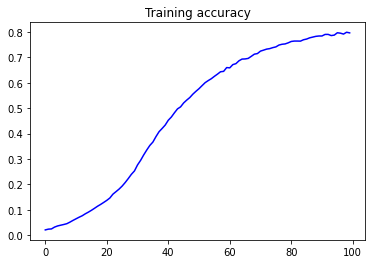

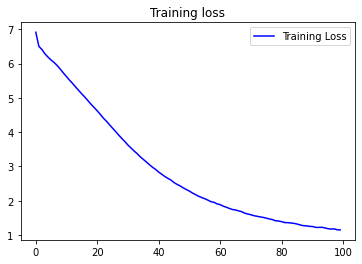

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [32]:
seed_text = "Love is found where hope is scarce"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
 
	predict_x=model.predict(token_list) # note that the model.predict_class is removed in tf==2.6
	predicted=np.argmax(predict_x,axis=1)
 
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Love is found where hope is scarce truth and love to live and much now seen hate hate new ' prove last new directed spent living sun ' spent o'er lend memory age spent express'd staineth near latch shine express'd ' decays live hence ' grew long rolling rolling rolling ' forbid write rhyme days spent lie of to good date at your desire be view bear light dyed quite express'd staineth lend invention light light lend days outworn weeks worn staineth staineth staineth hate on dead ' spent spent dearer cause face aside remain ' shows now give give take all best seen weeds age respect
